<a href="https://colab.research.google.com/github/anutishah/project_chd/blob/main/decisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   Unnamed: 0  sex  age  education  currentSmoker  cigsPerDay  BPMeds  \
0        1267    1   58        1.0              0         0.0     0.0   
1        1209    0   40        1.0              1        15.0     0.0   
2        2050    0   52        1.0              0         0.0     0.0   
3        1183    1   38        2.0              1        43.0     0.0   
4        3225    0   43        1.0              0         0.0     0.0   

   prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0                0             0         0    220.0  143.0  104.0  29.85   
1                0             0         0    199.0  122.0   82.0  22.16   
2                0             0         0    275.0  112.0   71.0  25.68   
3                0             1         0    170.0  130.0   94.0  23.90   
4                0             0         0    202.0  124.0   92.0  21.26   

   heartRate  glucose  TenYearCHD  
0         75     87.0           1  
1         85     77.0           

<ipython-input-103-d4697e574bb2>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainData.dropna(inplace=True)
<ipython-input-103-d4697e574bb2>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testData.dropna(inplace=True)


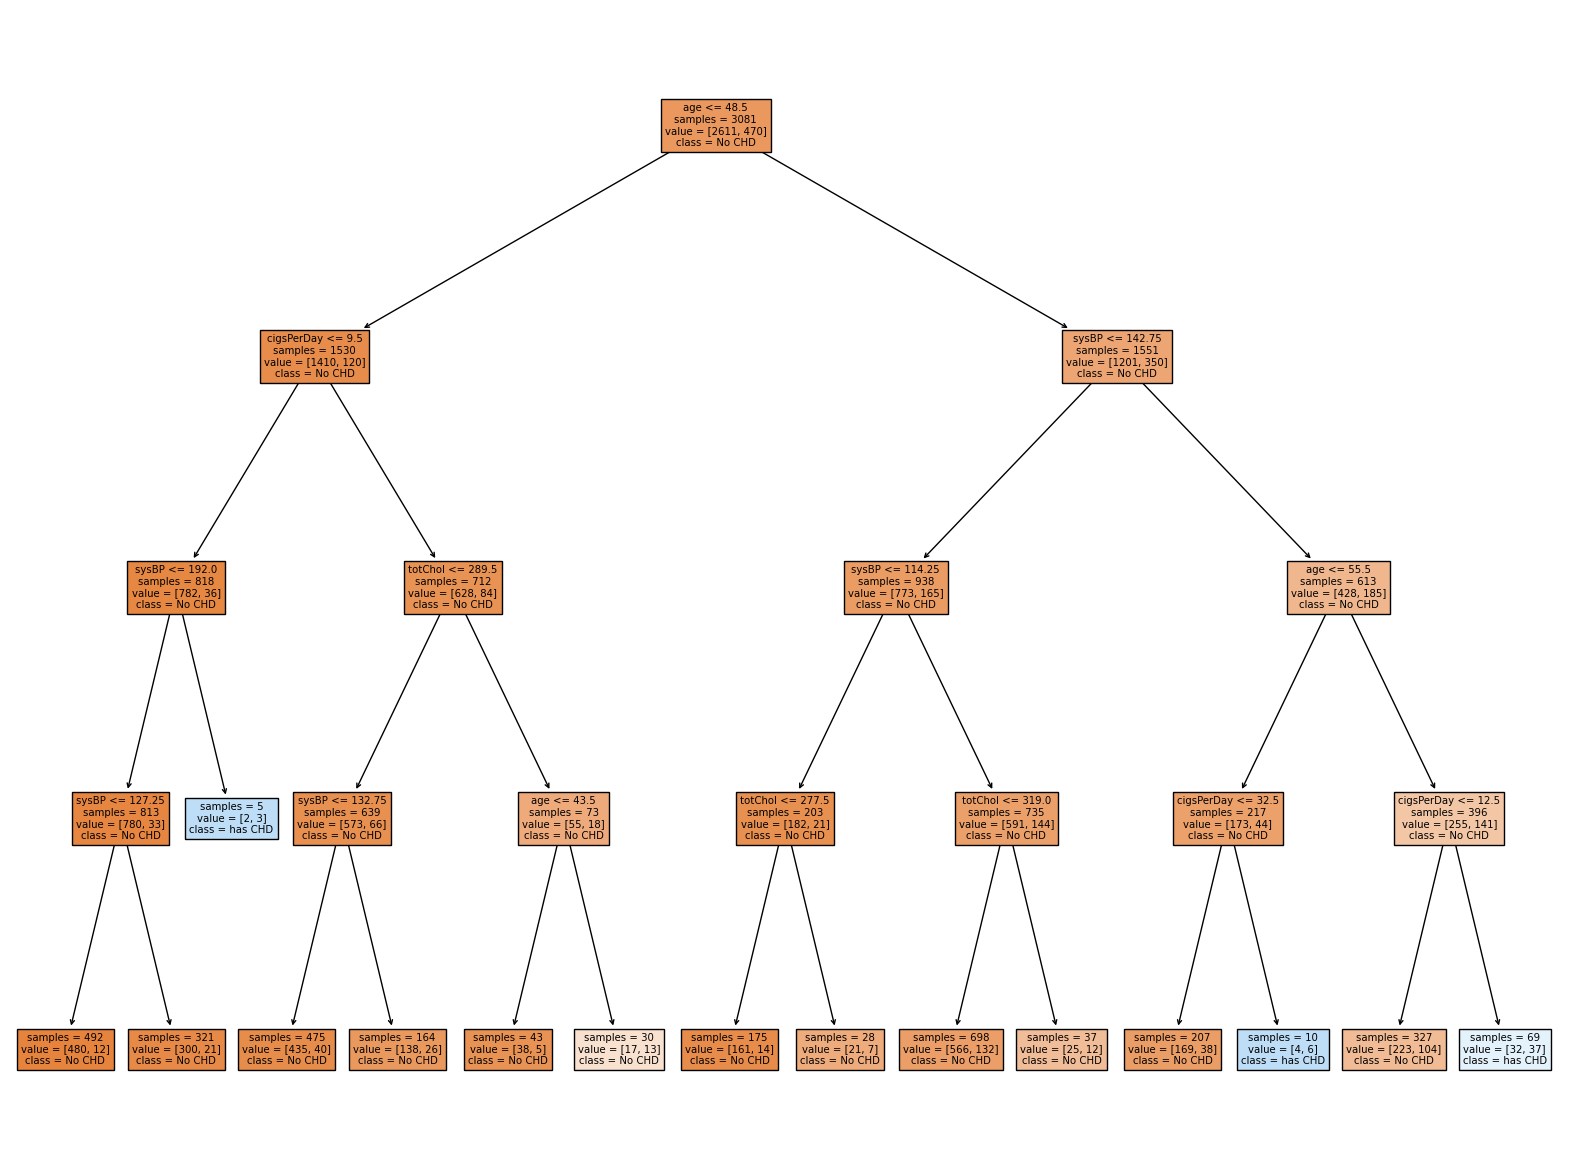

Accuracy: 0.8570038910505836


In [103]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree

#cleaned data
var_list = ['currentSmoker','BPMeds','prevalentStroke','prevalentHyp','diabetes']
output_filename = 'selected_chd_trainingdata_tree.csv'

df_train = pd.read_csv('/content/fhs_train.csv', low_memory = False)
df_train = df_train.dropna(subset = var_list)

df_test = pd.read_csv('/content/fhs_test.csv', low_memory = False)
df_test = df_test.dropna(subset = var_list)

print(df_train.head())

selected_features = ['age', 'currentSmoker', 'cigsPerDay', 'totChol', 'sysBP']
target_variable = 'TenYearCHD'

# filter dataset to include only selected features and target variable
trainData = df_train[selected_features + [target_variable]]
testData = df_test[selected_features + [target_variable]]

# process data
trainData.dropna(inplace=True)
testData.dropna(inplace=True)

# split training and testing data into features (X) and target variable (y)
X_train = trainData[selected_features]
y_train= trainData[target_variable]
X_test = testData[selected_features]
y_test= testData[target_variable]

#decision tree model
clf = DecisionTreeClassifier(max_depth=4, min_samples_leaf=5,random_state=42)
clf.fit(X_train , y_train)
var_names = clf.feature_names_in_
plt.figure(figsize=(20, 15))
plot_tree(clf,filled=True,feature_names=var_names, class_names=['No CHD', 'has CHD'], impurity=False)
plt.show()

y_pred = clf.predict(X_test)

# evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

